In [45]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [46]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

In [47]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

In [48]:
def label_image(img):
  word_label = img.split('_')[0]
  if word_label == 'NIKE': return [1,0]
  elif word_label == 'ADIDAS': return [0,1]

In [49]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)): # it is going to give the images one by one
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL
  img = Image.open(path)
  img = img.convert('L') # 'L' means Grey scale or Black & white img
  img = img.resize((IMG_SIZE,IMG_SIZE), Image.Resampling.LANCZOS)
  # we use "Image.Resampling.LANCZOS" to avoid the picture quality
  # create composite image by blending images using a transparency mask..
  # "Image.Resampling.LANCZOS" (a high-quality downsampling filter)

  train_data.append([np.array(img),np.array(label)])

shuffle(train_data)

100%|██████████| 100/100 [00:00<00:00, 332.20it/s]


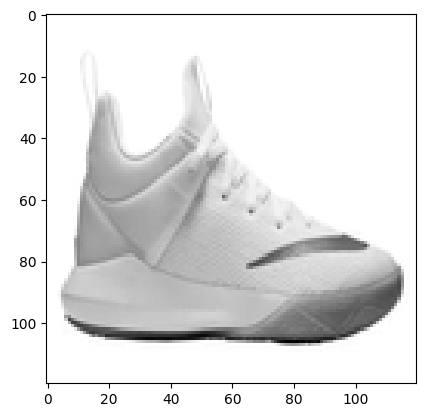

In [50]:
plt.imshow(train_data[35][0], cmap='gist_gray')
plt.show()

In [51]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [52]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape = (120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # flatten - it will convert the final matrix to array
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) # adidas or nike 2 options so last layer has 2 neurons

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(1, activation='sigmoid')  # For binary classification
# ])


In [53]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4260 - loss: 109.3902
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6150 - loss: 0.8291
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5071 - loss: 0.9330
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4762 - loss: 0.6901
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6444 - loss: 0.6906
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6565 - loss: 0.7083
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5249 - loss: 0.6918
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6317 - loss: 0.6818
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6145 - loss: 0.6689
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6452 - loss: 0.6796


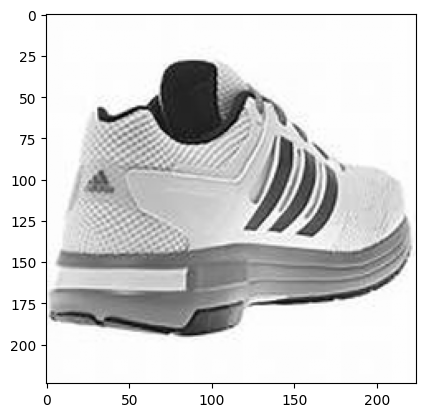

In [26]:
# PIL
img = Image.open('/content/adidastest.jpeg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.LANCZOS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [54]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.51481164, 0.4851884 ]], dtype=float32)